# Do Modelo à Estratégia: Como Medir o Impacto Financeiro de uma Solução de Machine Learning no Setor Bancário - Parte I

## Sumário

**PARTE I - Do Modelo à Estratégia: Como Medir o Impacto Financeiro de uma Solução de Machine Learning no Setor Bancário**

- 1. Importando as Bibliotecas Necessárias
- 2. Carregando os dados
- 3. Avaliando as Variáveis
- 4. Análise Exploratória e Visualização de Dados
- 5. Seleção de Variáveis
- 6. Tratamento das variáveis categóricas
- 7. Separando as variáveis independentes da Target
- 8. Normalização
- 9. Modelo de Regressão Logística
- 10. Avaliação do modelo Regressão Logística
 
**PARTE II - Do Modelo à Estratégia: Um Caso de Sucesso na Geração de Receita com Machine Learning**

- 1. Importando Bibliotecas Necessárias
- 2. Modelagem usando Árvore de Decisão
- 3. Modelagem usando Random Forest - RandomOverSampler
- 4. Modelagem usando Random Forest - RandomUnderSampler
- 5. Contribuição das Variáveis
 
A base de dados utilizada pode ser encontrada em: [Kaggle.com](https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions/data)

Para entender o contexto de negócio em que o código abaixo foi utilizado veja o artigo no Medium: [https://medium.com/@fagna.felix/](https://medium.com/@fagna.felix/do-modelo-%C3%A0-estrat%C3%A9gia-como-medir-o-impacto-financeiro-de-uma-solu%C3%A7%C3%A3o-de-machine-learning-no-ba80e5231085). Tempo de leitura, 8 minutos. Este é o primeiro artigo de uma sequência de três artigos.

**OBSERVAÇÃO:** Esse código é continuação do notebook: [MLparaPrevisaoDepositoBancario/ClientesBancoML-ParteI](https://github.com/Fagna/MLparaPrevisaoDepositoBancario/blob/main/ClientesBancoML-ParteI.ipynb). O único acréscimo ocorre a partir de: **PARTE II - Do Modelo à Estratégia: Um Caso de Sucesso na Geração de Receita com Machine Learning** que é o título do segundo artigo da sequência de três artigos. Acesse o mesmo pelo link: [https://medium.com/@fagna.felix/artigo2](https://medium.com/@fagna.felix/do-modelo-%C3%A0-estrat%C3%A9gia-um-caso-de-sucesso-na-gera%C3%A7%C3%A3o-de-receita-com-machine-learning-parte-ii-237606db091f)


### 1. Importando as Bibliotecas Necessárias

In [1]:
# Bibliotecas de manipulação de dados e visualização
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para dividir os dados e criar modelos
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Módulo de Análise Exploratória
import aed

### 2. Carregando os dados

In [2]:
# Carregando o dataset dos dados de treino
df_train = pd.read_csv("train.csv")

# Carregando o dataset dos dados de treino
df_test = pd.read_csv("test.csv")

# Visualizando as primeiras linhas dos dados
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 3. Avaliando as Variáveis

In [3]:
# Verificando o tipo de cada coluna
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Resumo estatístico das variáveis numéricas
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# Verificando valores ausentes
print("Valores ausentes:\n", df_train.isnull().sum())

Valores ausentes:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### 4. Análise Exploratória e Visualização de Dados

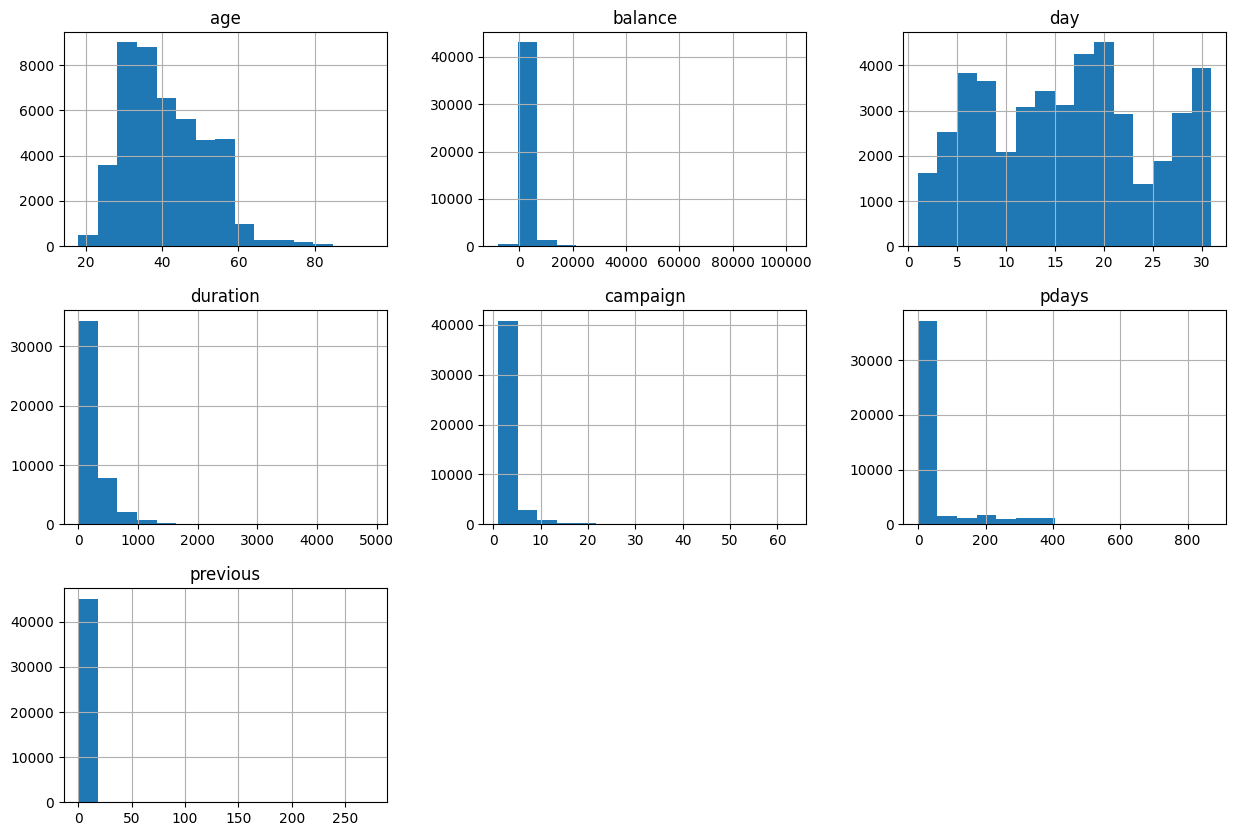

In [6]:
# Distribuição das variáveis numéricas
df_train.hist(bins=15, figsize=(15, 10))
plt.show()

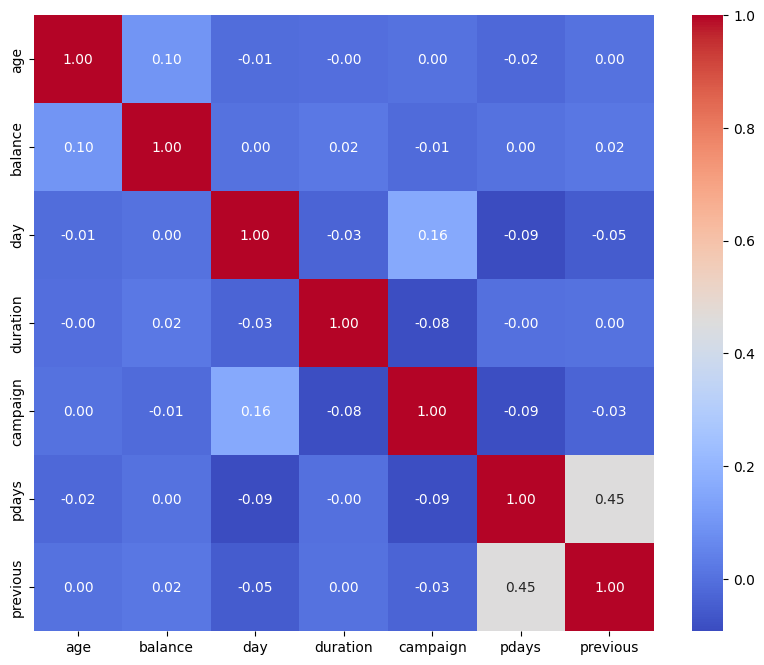

In [7]:
# Mapa de calor de correlação apenas entre as variáveis númericas 
numerical_cols = df_train.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### 5. Seleção de Variáveis

A seleção de variáveis para o modelo de Machine Learning foi realizada usando Information Value. Seleção feita previamente via Excel:

![Tabela Information Value (IV)](IV.png)

Agora removemos as variáveis que não serão usadas no modelo. Neste caso, as variáveis que serão usadas no modelo são: age, job, housing, contact, month, duration, pdays, previous e poutcome. As variáveis especificadas no código abaixo serão removidas da base de dados.

In [8]:
# Removendo variáveis irrelevantes para o modelo pelo Information Value feita no Excel - base de treino
df_train.drop(['marital','education','default','balance','loan','day','campaign'], axis=1, inplace = True)

# Removendo variáveis irrelevantes para o modelo pelo Information Value feita no Excel - base de teste
df_test.drop(['marital','education','default','balance','loan','day','campaign'], axis=1, inplace = True)

Agora vamos avaliar a presença de valores atípicos (outliers) nas variáveis númericas que serão modeladas

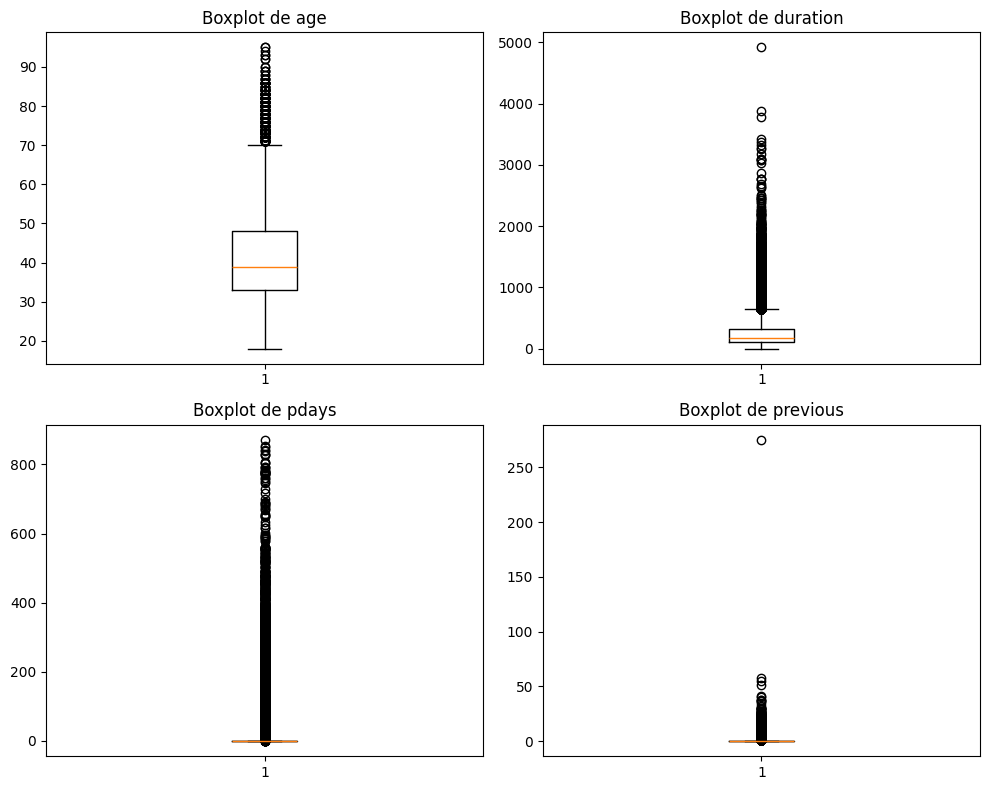

In [9]:
# Variáveis numéricas
colunas = ['age', 'duration', 'pdays', 'previous']

# Criando figura com 2 linhas e 2 colunas
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Achatando dos eixos (para facilitar o loop)
axs = axs.flatten()

# Plotando cada variável em um subplot
for i, col in enumerate(colunas):
    axs[i].boxplot(df_train[col])
    axs[i].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

Parece que as observações identificadas como atípicas são característicos dos dados e por isso não devem ser eliminadas, claro que esses valores podem interferir no desempenho do modelo, mas técnicas de normalização ou padronização podem resolver esse problema.

### 6. Tratamento das variáveis categóricas

In [10]:
# Lista das colunas categóricas
cols_cat = ['job', 'housing', 'contact', 'month', 'poutcome', 'y']

# Criar um dicionário para armazenar os encoders
encoders = {}

# Aplicar LabelEncoder na base de treino
for col in cols_cat:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])  # aplica o mesmo mapeamento do treino
    encoders[col] = le  # salva o encoder caso queira reverter depois

In [11]:
display(df_train)

,age,job,housing,contact,month,duration,pdays,previous,poutcome,y
0,58,4,1,2,8,261,-1,0,3,0
1,44,9,1,2,8,151,-1,0,3,0
2,33,2,1,2,8,76,-1,0,3,0
3,47,1,1,2,8,92,-1,0,3,0
4,33,11,0,2,8,198,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,9,0,0,9,977,-1,0,3,1
45207,71,5,0,0,9,456,-1,0,3,1
45208,72,5,0,0,9,1127,184,3,2,1
45209,57,1,0,1,9,508,-1,0,3,0


### 7. Separando as variáveis independentes da Target

In [12]:
# Separação para dados de treino
X_train = df_train.drop(columns=['y'])  # Variáveis independentes
y_train = df_train['y']  # Variável dependente

# Separação para dados de teste
X_test = df_test.drop(columns=['y'])  # Variáveis independentes
y_test = df_test['y']  # Variável dependente

### 8. Normalização

In [13]:
scaler = StandardScaler()

# Aplicando a padronização nas variáveis numéricas
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 9. Modelo de Regressão Logística

In [14]:
# 1. Criando o modelo de regressão logística
model = LogisticRegression(random_state=42)

# 2. Treinando o modelo com os dados de treino
model.fit(X_train_scaled, y_train)

# 3. Fazendo previsões
y_pred_train = model.predict(X_train_scaled)  # Previsão no treino
y_pred_test = model.predict(X_test_scaled)    # Previsão no teste

### 10. Avaliação do modelo Regressão Logística

In [15]:
# 4. Matriz de Confusão
print("Matriz de Confusão (Treinamento):\n", confusion_matrix(y_train, y_pred_train))
print("Matriz de Confusão (Teste):\n", confusion_matrix(y_test, y_pred_test))

# 5. Acurácia
print("Acurácia (Treinamento): ", accuracy_score(y_train, y_pred_train))
print("Acurácia (Teste): ", accuracy_score(y_test, y_pred_test))

# 6. Relatório F1-Score (com precisão e recall incluídos)
print("Relatório de Classificação (Treinamento):\n", classification_report(y_train, y_pred_train))
print("Relatório de Classificação (Teste):\n", classification_report(y_test, y_pred_test))

Matriz de Confusão (Treinamento):
 [[39205   717]
 [ 4197  1092]]
Matriz de Confusão (Teste):
 [[3922   78]
 [ 417  104]]
Acurácia (Treinamento):  0.8913096370352348
Acurácia (Teste):  0.8905109489051095
Relatório de Classificação (Treinamento):
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211

Relatório de Classificação (Teste):
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.57      0.20      0.30       521

    accuracy                           0.89      4521
   macro avg       0.74      0.59      0.62      4521
weighted avg       0.87      0.89      0.87      4521



In [16]:
# 7. AUC-ROC (precisa da probabilidade da classe positiva)
y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe positiva
auc_score = roc_auc_score(y_test, y_pred_proba_test)
print(f"AUC-ROC (Teste): {auc_score:.4f}")

AUC-ROC (Teste): 0.8448


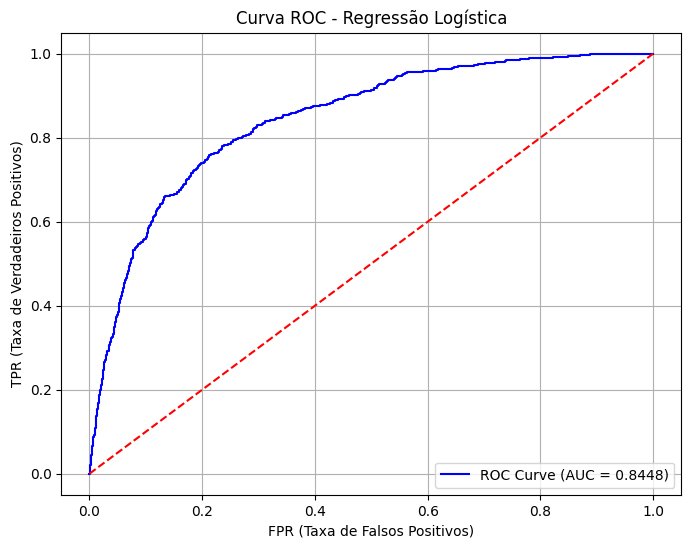

In [17]:
# 8. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Linha aleatória
plt.xlabel('FPR (Taxa de Falsos Positivos)')
plt.ylabel('TPR (Taxa de Verdadeiros Positivos)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

A princípio o resultado parece ótimo, mas com um impacto bem ruim para o negócio. Em artigos futuros vamos trabalhar na melhoria do modelo de dados para o négócio e ao final vamos vamos discutir porque o uso de algumas variáveis nesse modelo não fazem sentido, e podem gerar um problema de data leakage.

# Do Modelo à Estratégia: Um Caso de Sucesso na Geração de Receita com Machine Learning - Parte II

A seguir o código utilizado para a segunda parte do artigo. O passo a passo seguinte foi necessário:

- Utilização de técnicas de reamostragem devido o desbalanceamento dos dados
- Uso de modelos mais robustos como o Random Forest
- Utilização de Grid Search para ajuste de hiperparâmetros

Vários testes foram realizados usando diferentes técnicas de reamostragem e várias combinações de hiperparâmetros, abaixo é apresentado os melhores resultados para modelo de Árvore de Decisão e Random Forest usando como critério o Recall obtido nos dados de teste.


### 1. Importando Bibliotecas Necessárias

In [18]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks #subamostragem  da classe majoritária 
from imblearn.over_sampling import RandomOverSampler, SMOTE # Superamostragem da classe minoritária
from imblearn.combine import SMOTEENN, SMOTETomek # Combina as duas técnicas
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline

### 2. Modelagem usando Árvore de Decisão

O resultado abaixo considera os melhores hiperparâmetros entre todas as posibilidades testadas e o melhor método de reamostragem, neste caso RandomOverSampler=1, ou seja, o número de observações da classe minoritária foi igualada ao número de observações da classe majoritária.

In [19]:
# Pipeline com hiperparâmetros já definidos (baseados em recall)
model_tree = ImbPipeline([
    ('over', RandomOverSampler(sampling_strategy=1.0, random_state=42)),
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(
        criterion='gini',
        max_depth=3,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

# Treinamento do pipeline
model_tree.fit(X_train, y_train)

# Reamostragem manual para visualização e métricas no treino
X_resampled, y_resampled = model_tree.named_steps['over'].fit_resample(X_train, y_train)

# Previsões
y_pred_train = model_tree.predict(X_resampled)
y_pred_test = model_tree.predict(X_test)

# Avaliação
print("Antes da Reamostragem:", Counter(y_train))
print("Depois da Reamostragem:", Counter(y_resampled))

print("Acurácia (Treinamento): ", accuracy_score(y_resampled, y_pred_train))
print("Acurácia (Teste): ", accuracy_score(y_test, y_pred_test))

print("AUC-ROC (Treino):", roc_auc_score(y_resampled, model_tree.predict_proba(X_resampled)[:, 1]))
print("AUC-ROC (Teste):", roc_auc_score(y_test, model_tree.predict_proba(X_test)[:, 1]))

print("Matriz de Confusão (Treinamento):\n", confusion_matrix(y_resampled, y_pred_train))
print("Matriz de Confusão (Teste):\n", confusion_matrix(y_test, y_pred_test))

print("Relatório de Classificação (Treinamento):\n", classification_report(y_resampled, y_pred_train))
print("Relatório de Classificação (Teste):\n", classification_report(y_test, y_pred_test))

Antes da Reamostragem: Counter({0: 39922, 1: 5289})
Depois da Reamostragem: Counter({0: 39922, 1: 39922})
Acurácia (Treinamento):  0.7867842292470317
Acurácia (Teste):  0.7142225171422252
AUC-ROC (Treino): 0.8349163226389752
AUC-ROC (Teste): 0.8358502879078695
Matriz de Confusão (Treinamento):
 [[27898 12024]
 [ 5000 34922]]
Matriz de Confusão (Teste):
 [[2763 1237]
 [  55  466]]
Relatório de Classificação (Treinamento):
               precision    recall  f1-score   support

           0       0.85      0.70      0.77     39922
           1       0.74      0.87      0.80     39922

    accuracy                           0.79     79844
   macro avg       0.80      0.79      0.79     79844
weighted avg       0.80      0.79      0.79     79844

Relatório de Classificação (Teste):
               precision    recall  f1-score   support

           0       0.98      0.69      0.81      4000
           1       0.27      0.89      0.42       521

    accuracy                           0.71   

### 3. Modelagem usando Random Forest - RandomOverSampler

In [20]:
# Pipeline com oversampling e melhores hiperparâmetros
model_rf_over = ImbPipeline([
    ('over', RandomOverSampler(sampling_strategy=1.0, random_state=42)),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        bootstrap=True,
        max_depth=10,
        max_features='sqrt',
        min_samples_leaf=1,
        min_samples_split=5,
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Treinamento
model_rf_over.fit(X_train, y_train)

# Reamostragem para avaliação no treino
X_resampled_over, y_resampled_over = model_rf_over.named_steps['over'].fit_resample(X_train, y_train)

# Previsões
y_pred_train_over = model_rf_over.predict(X_resampled_over)
y_pred_test_over = model_rf_over.predict(X_test)

# Avaliação
print("\n==> Avaliação do model_rf_over (RandomOverSampler)")
print("Antes:", Counter(y_train))
print("Depois:", Counter(y_resampled_over))

print("Acurácia (Treinamento):", accuracy_score(y_resampled_over, y_pred_train_over))
print("Acurácia (Teste):", accuracy_score(y_test, y_pred_test_over))

print("AUC-ROC (Treino):", roc_auc_score(y_resampled_over, model_rf_over.predict_proba(X_resampled_over)[:, 1]))
print("AUC-ROC (Teste):", roc_auc_score(y_test, model_rf_over.predict_proba(X_test)[:, 1]))

print("Matriz de Confusão (Treinamento):\n", confusion_matrix(y_resampled_over, y_pred_train_over))
print("Matriz de Confusão (Teste):\n", confusion_matrix(y_test, y_pred_test_over))

print("Relatório de Classificação (Treinamento):\n", classification_report(y_resampled_over, y_pred_train_over))
print("Relatório de Classificação (Teste):\n", classification_report(y_test, y_pred_test_over))



==> Avaliação do model_rf_over (RandomOverSampler)
Antes: Counter({0: 39922, 1: 5289})
Depois: Counter({0: 39922, 1: 39922})
Acurácia (Treinamento): 0.8716497169480487
Acurácia (Teste): 0.8352134483521345
AUC-ROC (Treino): 0.9474589421618034
AUC-ROC (Teste): 0.9404961612284068
Matriz de Confusão (Treinamento):
 [[33722  6200]
 [ 4048 35874]]
Matriz de Confusão (Teste):
 [[3316  684]
 [  61  460]]
Relatório de Classificação (Treinamento):
               precision    recall  f1-score   support

           0       0.89      0.84      0.87     39922
           1       0.85      0.90      0.88     39922

    accuracy                           0.87     79844
   macro avg       0.87      0.87      0.87     79844
weighted avg       0.87      0.87      0.87     79844

Relatório de Classificação (Teste):
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      4000
           1       0.40      0.88      0.55       521

    accuracy                

### 4. Modelagem usando Random Forest - RandomUnderSampler

In [21]:
# Pipeline com undersampling e melhores hiperparâmetros
model_rf_under = ImbPipeline([
    ('under', RandomUnderSampler(sampling_strategy=1.0, random_state=42)),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        bootstrap=True,
        max_depth=10,
        max_features='sqrt',
        min_samples_leaf=2,
        min_samples_split=5,
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# Treinamento
model_rf_under.fit(X_train, y_train)

# Reamostragem para avaliação no treino
X_resampled_under, y_resampled_under = model_rf_under.named_steps['under'].fit_resample(X_train, y_train)

# Previsões
y_pred_train_under = model_rf_under.predict(X_resampled_under)
y_pred_test_under = model_rf_under.predict(X_test)

# Avaliação
print("\n==> Avaliação do model_rf_under (RandomUnderSampler)")
print("Antes:", Counter(y_train))
print("Depois:", Counter(y_resampled_under))

print("Acurácia (Treinamento):", accuracy_score(y_resampled_under, y_pred_train_under))
print("Acurácia (Teste):", accuracy_score(y_test, y_pred_test_under))

print("AUC-ROC (Treino):", roc_auc_score(y_resampled_under, model_rf_under.predict_proba(X_resampled_under)[:, 1]))
print("AUC-ROC (Teste):", roc_auc_score(y_test, model_rf_under.predict_proba(X_test)[:, 1]))

print("Matriz de Confusão (Treinamento):\n", confusion_matrix(y_resampled_under, y_pred_train_under))
print("Matriz de Confusão (Teste):\n", confusion_matrix(y_test, y_pred_test_under))

print("Relatório de Classificação (Treinamento):\n", classification_report(y_resampled_under, y_pred_train_under))
print("Relatório de Classificação (Teste):\n", classification_report(y_test, y_pred_test_under))



==> Avaliação do model_rf_under (RandomUnderSampler)
Antes: Counter({0: 39922, 1: 5289})
Depois: Counter({0: 5289, 1: 5289})
Acurácia (Treinamento): 0.8738892040083192
Acurácia (Teste): 0.8214996682149966
AUC-ROC (Treino): 0.9536235177545221
AUC-ROC (Teste): 0.9284102687140114
Matriz de Confusão (Treinamento):
 [[4497  792]
 [ 542 4747]]
Matriz de Confusão (Teste):
 [[3248  752]
 [  55  466]]
Relatório de Classificação (Treinamento):
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      5289
           1       0.86      0.90      0.88      5289

    accuracy                           0.87     10578
   macro avg       0.87      0.87      0.87     10578
weighted avg       0.87      0.87      0.87     10578

Relatório de Classificação (Teste):
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      4000
           1       0.38      0.89      0.54       521

    accuracy                    

### 5. Contribuição das Variáveis

Retornando as variáveis que  foram mais importantes para o modelo escolhido. 

In [24]:
model = model_rf_under.named_steps['model']
pd.DataFrame({'Variável': X_train.columns, 'Importância': model.feature_importances_}) \
  .sort_values('Importância', ascending=False, ignore_index=True)

,Variável,Importância
0,duration,0.529665
1,month,0.097519
2,contact,0.076343
3,age,0.065952
4,pdays,0.063777
5,poutcome,0.055165
6,housing,0.052129
7,previous,0.034600
8,job,0.024850
